# Who survived the Titantic?

## General Set-Up

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np
import os

##Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_dir = os.getcwd()
student_file = data_dir + '/TitanicData.csv'
df = pd.read_csv(student_file, index_col=0)
df.head()

,pclass,survived,name,sex,age,siblings/spouses,parents/children,ticket,fare,cabin,embarked,boat,body,home.dest
pid,,,,,,,,,,,,,,
1,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,NaN,NaN,NaN
2,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.25,NaN,S,NaN,NaN,"East Providence, RI"
3,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,NaN,190.0,"East Providence, RI"
4,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,A,NaN,"East Providence, RI"
5,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.65,NaN,S,16,NaN,"Norway Los Angeles, CA"


## VISUALIZATION
### Embarked

In [4]:
ccounter = 0
scounter = 0
qcounter = 0

c_not_survived = df.loc[(df['embarked']== 'C') & (df['survived'] == 0)]
c = df.loc[(df['embarked']== 'C')]

s_not_survived = df.loc[(df['embarked']== 'S') & (df['survived'] == 0)]
s = df.loc[(df['embarked']== 'S')]

q_not_survived = df.loc[(df['embarked']== 'Q') & (df['survived'] == 0)]
q = df.loc[(df['embarked']== 'Q')]

for item in c_not_survived['embarked']:
    ccounter += 1
    
for item in s_not_survived['embarked']:
    scounter += 1
    
for item in q_not_survived['embarked']:
    qcounter += 1

cfinal = (ccounter/ len(c) * 100)
sfinal = (scounter/ len(s) * 100)
qfinal = (qcounter/ len(q) * 100)

print ("C: ", cfinal, " ", "S:", sfinal, " ", "Q: ", qfinal)

data = [['Cherbourg', cfinal], ['Southampton', sfinal], ['Queenstown', qfinal]] 
embarkment = pd.DataFrame(data, columns = ['Port', 'Death Rate'])
embarkment

C:  44.44444444444444   S: 66.73960612691467   Q:  64.22764227642277


,Port,Death Rate
0,Cherbourg,44.444444
1,Southampton,66.739606
2,Queenstown,64.227642


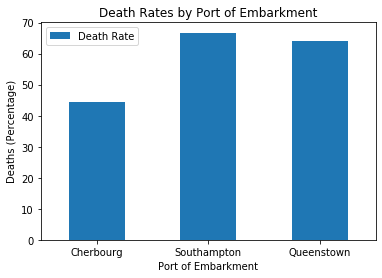

In [5]:
ax = embarkment.plot.bar(x='Port', y='Death Rate', rot=0)
plt.ylabel('Deaths (Percentage)')
plt.xlabel('Port of Embarkment')
plt.title('Death Rates by Port of Embarkment')
plt.legend()

### PCLASS

In [6]:
p1counter = 0
p2counter = 0
p3counter = 0

p1_not_survived = df.loc[(df['pclass']== 1) & (df['survived'] == 0)]
p1 = df.loc[(df['pclass']== 1)]

p2_not_survived = df.loc[(df['pclass']== 2) & (df['survived'] == 0)]
p2 = df.loc[(df['pclass']== 2)]

p3_not_survived = df.loc[(df['pclass']== 3) & (df['survived'] == 0)]
p3 = df.loc[(df['pclass']== 3)]

for item in p1_not_survived['pclass']:
    p1counter += 1
    
for item in p2_not_survived['pclass']:
    p2counter += 1
    
for item in p3_not_survived['pclass']:
    p3counter += 1

p1final = (p1counter/ len(p1) * 100)
p2final = (p2counter/ len(p2) * 100)
p3final = (p3counter/ len(p3) * 100)

print ("1st Class: ", p1final, " ", "2nd Class:", p2final, " ", "3rd Class: ", p3final)

data = [['1st', p1final], ['2nd', p2final], ['3rd', p3final]] 
pclass = pd.DataFrame(data, columns = ['Passenger Class', 'Death Rate'])
pclass

1st Class:  38.080495356037154   2nd Class: 57.03971119133574   3rd Class:  74.47108603667137


,Passenger Class,Death Rate
0,1st,38.080495
1,2nd,57.039711
2,3rd,74.471086


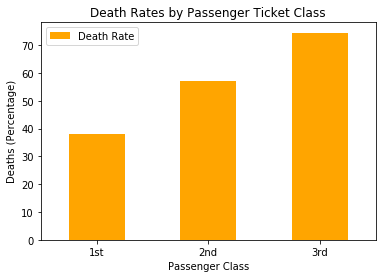

In [79]:
bx = pclass.plot.bar(x='Passenger Class', y='Death Rate', rot=0, color = 'orange')
plt.ylabel('Deaths (Percentage)')
plt.xlabel('Passenger Class')
plt.title('Death Rates by Passenger Ticket Class')
plt.legend()